In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
import numpy as np
from matplotlib.ticker import MultipleLocator
import MDAnalysis as mda
from MDAnalysis.analysis import contacts
from MDAnalysis.analysis import distances
import pandas as pd
%matplotlib inline
import os
#from scikits.bootstrap import ci
from ci import ci_time_correl
from uncertainties import ufloat

In [2]:
compounds = ["ADOS", "ADP", "ALO", "AMP", "ATP", "DMNFQ", "DMNFQH2", "FAD", "FMN", "GBZ", "HAQO", "HAQOH", "HQNO", "HQNOH", "ISO", "MND", "MNDOL", "MNQ", "MNQOL", "NAD+", "NADH", "NADP+", "NADPH", "NRBOS", "PQ", "PQOL", "RBFL", "RIB", "THI", "TMP", "TPP", "UBQ0", "UBQ0H2", "UBQN", "UBQNOL", "XQ", "XQH2"]
simulations = ["AA", "CG"]

SASAsAAvaluesdict = {}
SASAsCGvaluesdict = {}
SASAsAACIS = {}
SASAsCGCIS = {}
MeansAA = {}
MeansCG = {}
path_absolute = os.path.abspath(".")
for compound in compounds:
    path = path_absolute + f"/{compound}"
    if not os.path.isdir(path):
        continue
    os.chdir(path)
    SASAsAAvalues = np.loadtxt("SASA_AA.xvg", comments=("#","@")) if os.path.isfile("SASA_AA.xvg") else None
    if SASAsAAvalues is not None and len(SASAsAAvalues.shape) != 1:
        SASAsAAvalues = SASAsAAvalues[:,1]
        SASAsAACIS[compound] = ci_time_correl(SASAsAAvalues)
        MeansAA[compound] = (SASAsAACIS[compound][1] + SASAsAACIS[compound][0])/2
    else:
        SASAsAAvalues = SASAsAAvalues[1]
        SASAsAACIS[compound] = "None"
        MeansAA[compound] = SASAsAAvalues
    SASAsAAvaluesdict[compound] = SASAsAAvalues
    SASAsCGvalues = np.loadtxt("SASA_CG.xvg", comments=("#","@")) if os.path.isfile("SASA_CG.xvg") else None
    if SASAsCGvalues is not None and len(SASAsCGvalues.shape) != 1:
        SASAsCGvalues = SASAsCGvalues[:,1]        
        SASAsCGCIS[compound] = ci_time_correl(SASAsCGvalues)
        MeansCG[compound] = (SASAsCGCIS[compound][1] + SASAsCGCIS[compound][0])/2
    else:
        SASAsCGvalues = SASAsCGvalues[1]
        SASAsCGCIS[compound] = "None"
        MeansCG[compound] = SASAsCGvalues
    SASAsCGvaluesdict[compound] = SASAsCGvalues
    
SASAsAAdifferences = {}
SASAsCGdifferences = {}

for compound, vals in SASAsAACIS.items():
    if type(vals) != type(str()):
        minimum, maximum = [abs(val - MeansAA[compound]) for val in vals]# vals != 'None']
        SASAsAAdifferences[compound] = [minimum, maximum]
    else:
        SASAsAAdifferences[compound] = [0, 0]

for compound, vals in SASAsCGCIS.items():
    if type(vals) != type(str()):
        minimum, maximum = [abs(val - MeansCG[compound]) for val in vals]# vals != 'None']
        SASAsCGdifferences[compound] = [minimum, maximum]
    else:
        SASAsCGdifferences[compound] = [0, 0]

In [3]:
MeansAA

{'ADOS': 5.3106249749247745,
 'ADP': 6.936454849498328,
 'ALO': 5.070822639296187,
 'AMP': 6.188337366753098,
 'ATP': 7.65322275334608,
 'DMNFQ': 4.315,
 'DMNFQH2': 4.463,
 'FAD': 9.944552631578947,
 'FMN': 7.602568181818182,
 'GBZ': 5.996270114942529,
 'HAQO': 3.865,
 'HAQOH': 4.08,
 'HQNO': 6.155,
 'HQNOH': 6.45,
 'ISO': 7.044019125683061,
 'MND': 4.23,
 'MNDOL': 4.234,
 'MNQ': 15.177,
 'MNQOL': 14.888,
 'NAD+': 9.180263440860214,
 'NADH': 9.822391891891892,
 'NADP+': 9.777014285714285,
 'NADPH': 10.863866666666667,
 'NRBOS': 5.50146256422804,
 'PQ': 15.535,
 'PQOL': 14.786,
 'RBFL': 6.766922222222222,
 'RIB': 3.6798202457264955,
 'THI': 5.601587387387387,
 'TMP': 6.164832499999999,
 'TPP': 6.715311023622048,
 'UBQ0': 4.433499128919861,
 'UBQ0H2': 4.393,
 'UBQN': 15.406,
 'UBQNOL': 15.521,
 'XQ': 3.77,
 'XQH2': 3.81}

In [4]:
SASAsAAdifferences

{'ADOS': [0.0019046138415248492, 0.001904613841523961],
 'ADP': [0.01212876254180717, 0.01212876254180717],
 'ALO': [0.000723460410557486, 0.000723460410557486],
 'AMP': [0.003581388648805195, 0.0035813886488043067],
 'ATP': [0.017658699808795753, 0.01765869980879664],
 'DMNFQ': [0, 0],
 'DMNFQH2': [0, 0],
 'FAD': [0.4779736842105251, 0.4779736842105269],
 'FMN': [0.0322651515151513, 0.0322651515151513],
 'GBZ': [0.05303448275862088, 0.053034482758619994],
 'HAQO': [0, 0],
 'HAQOH': [0, 0],
 'HQNO': [0, 0],
 'HQNOH': [0, 0],
 'ISO': [0.04753825136612111, 0.04753825136612022],
 'MND': [0, 0],
 'MNDOL': [0, 0],
 'MNQ': [0, 0],
 'MNQOL': [0, 0],
 'NAD+': [0.12013440860215141, 0.12013440860215141],
 'NADH': [0.15443693693693916, 0.15443693693693916],
 'NADP+': [0.23264285714285826, 0.23264285714285826],
 'NADPH': [0.13183809523809664, 0.13183809523809487],
 'NRBOS': [0.0023553951553711983, 0.00235539515537031],
 'PQ': [0, 0],
 'PQOL': [0, 0],
 'RBFL': [0.029499999999999638, 0.0295000000000

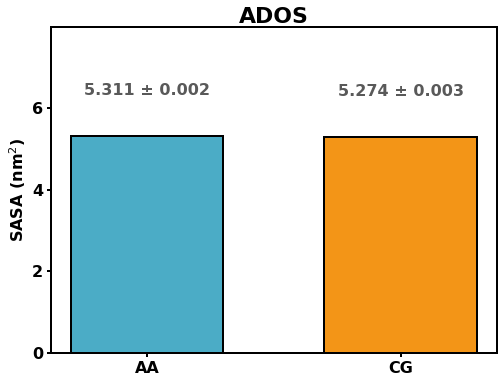

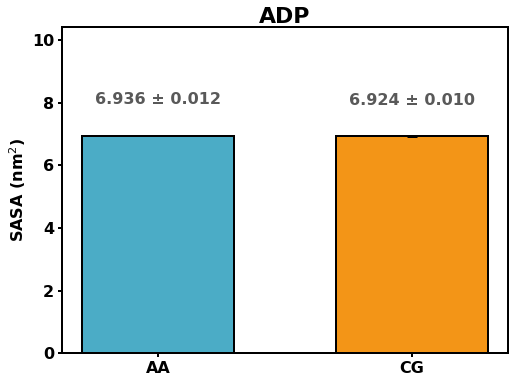

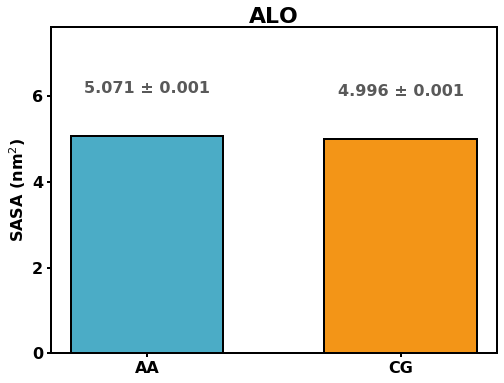

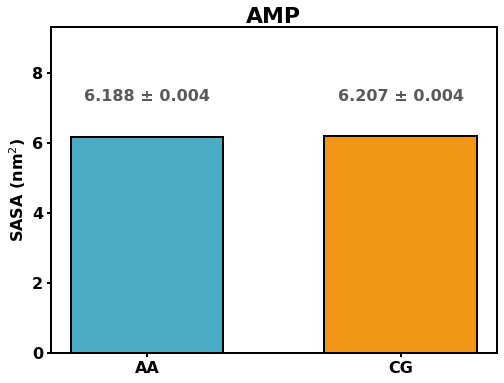

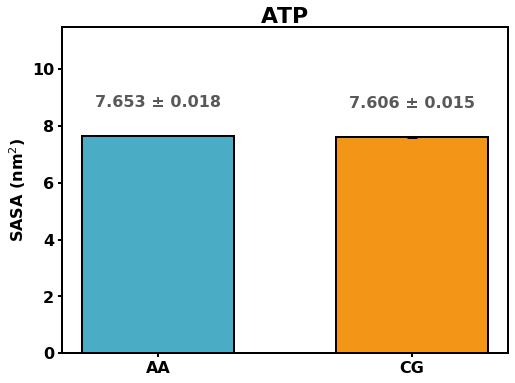

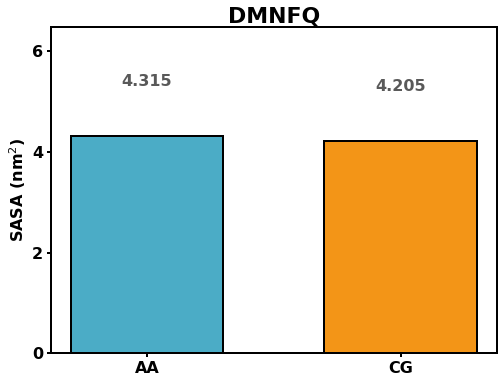

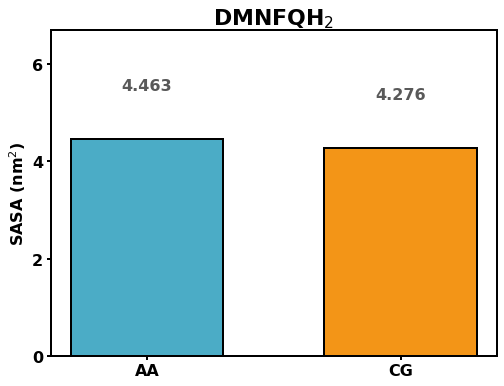

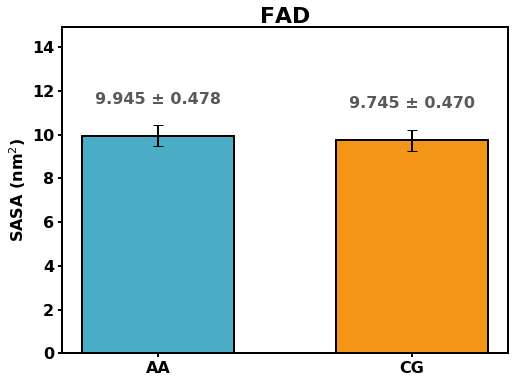

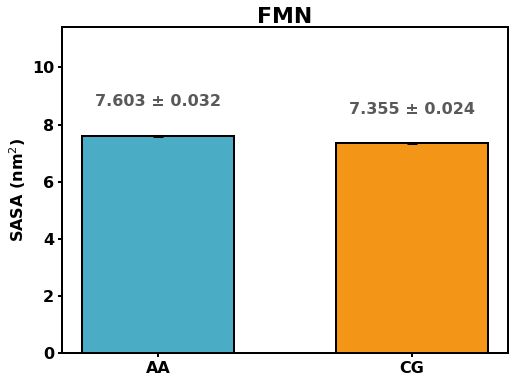

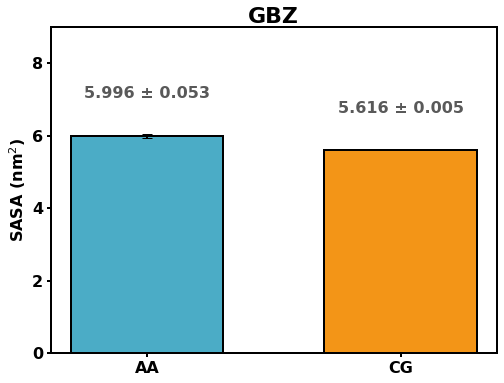

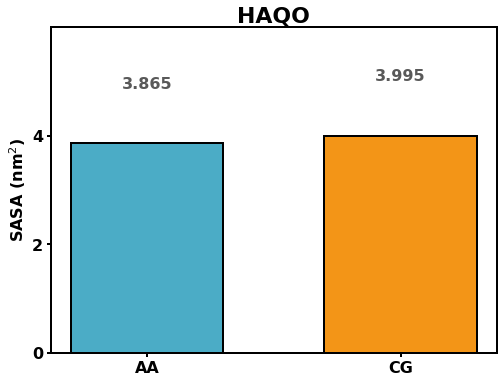

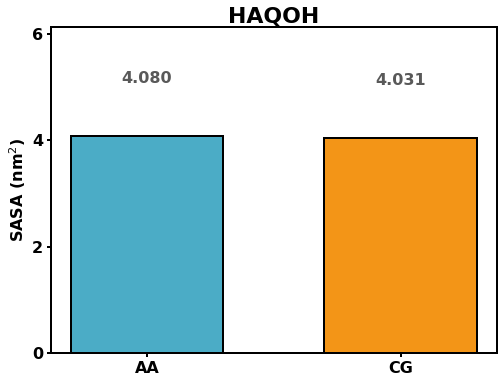

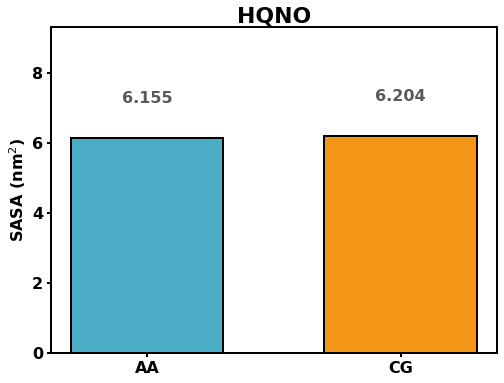

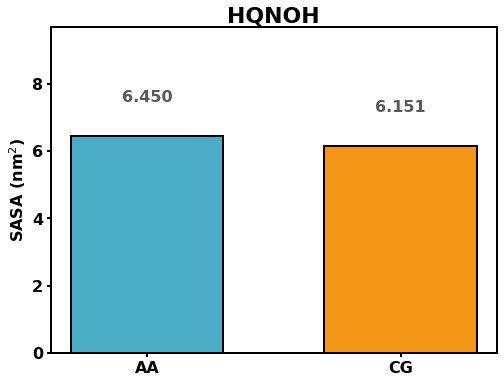

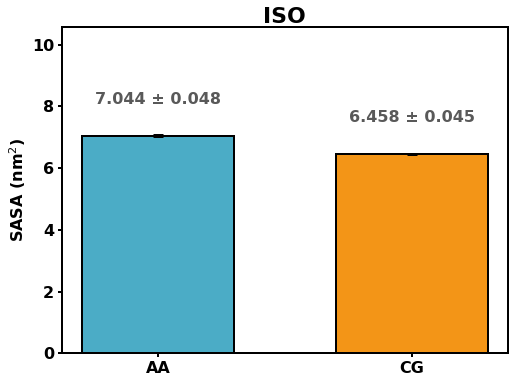

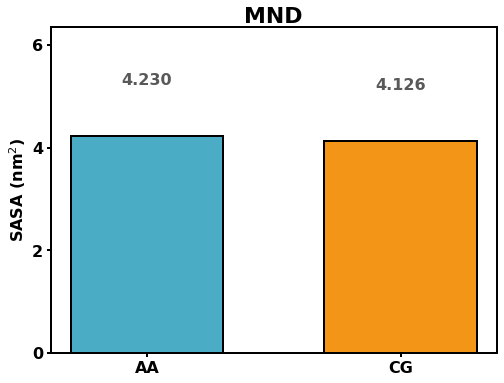

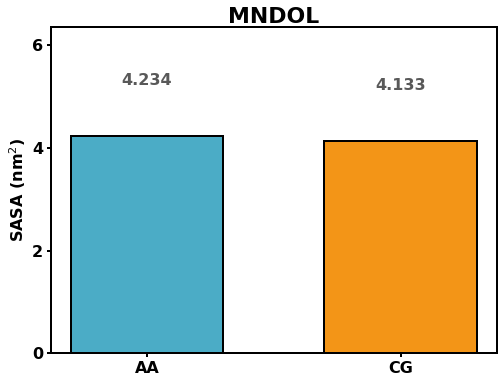

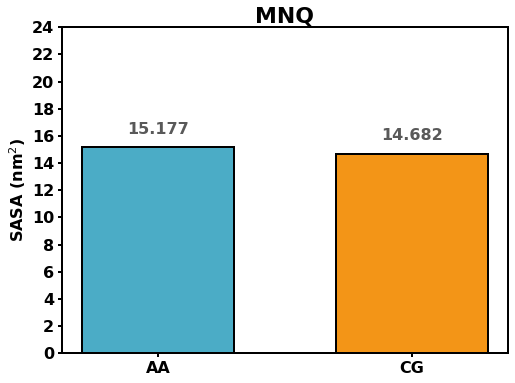

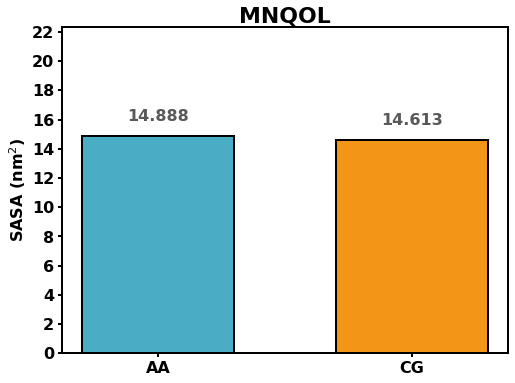

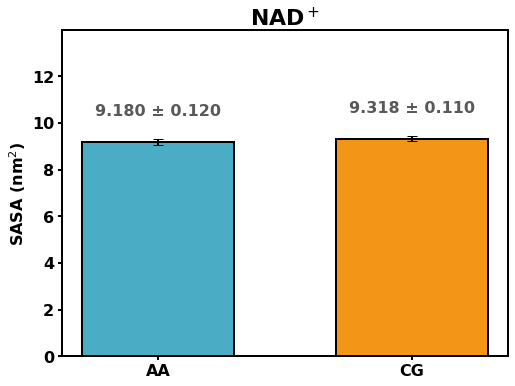

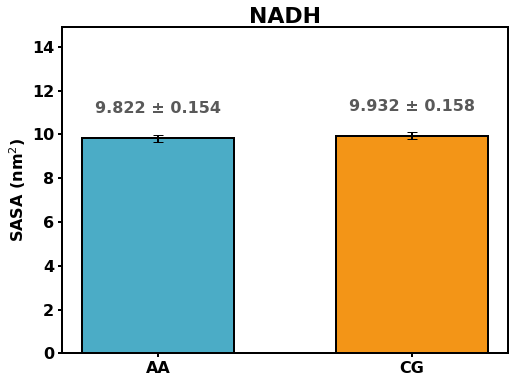

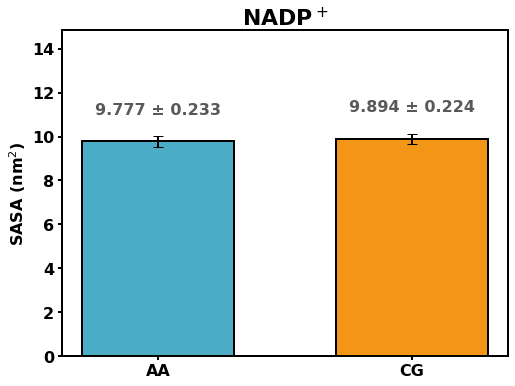

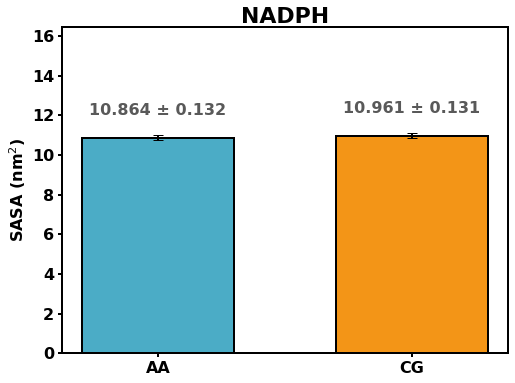

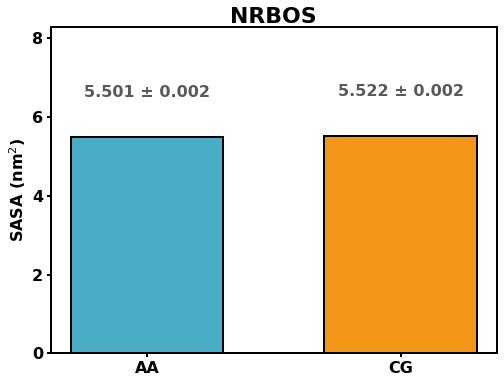

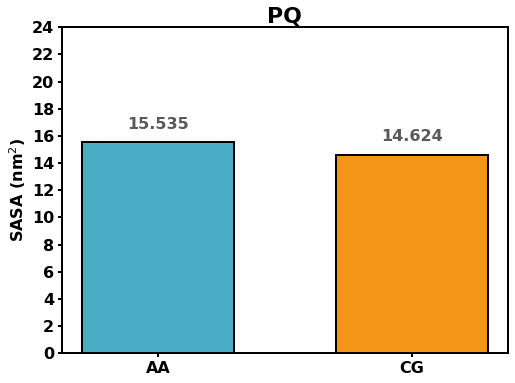

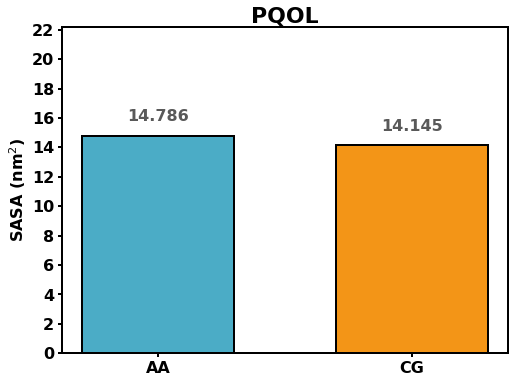

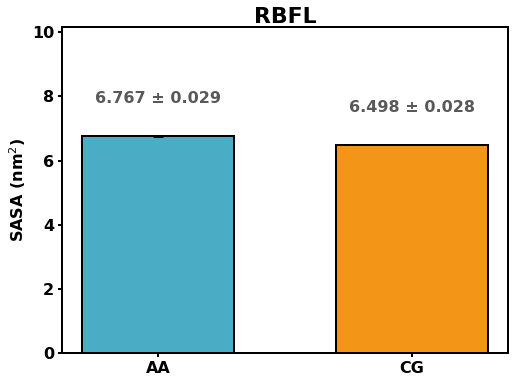

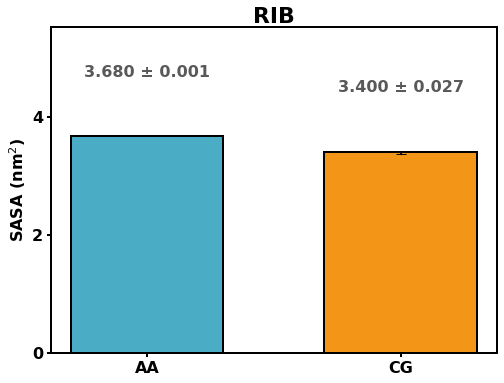

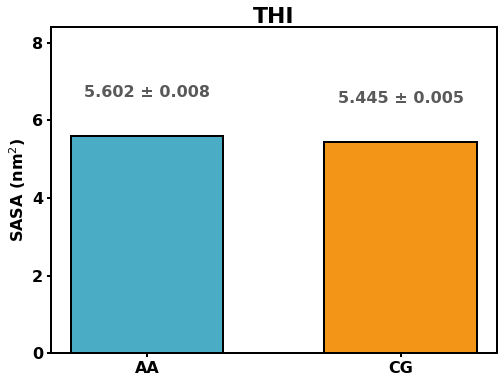

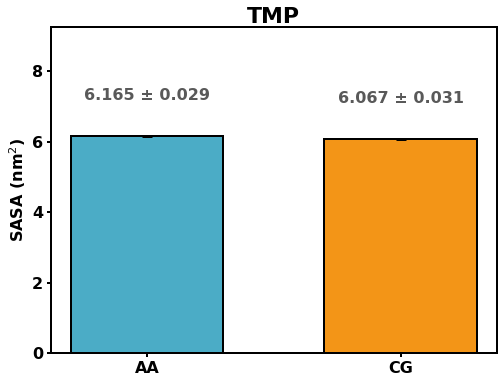

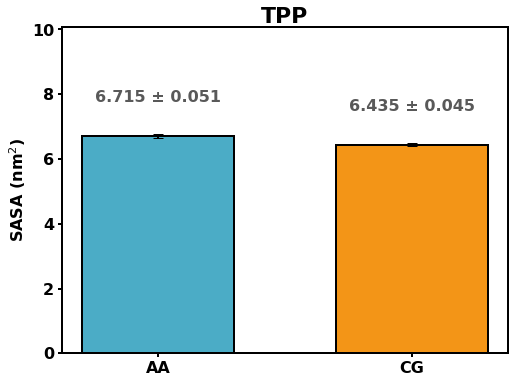

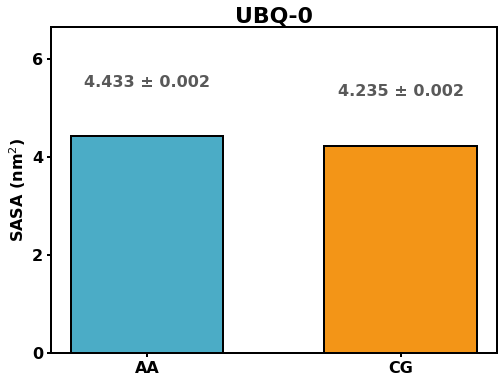

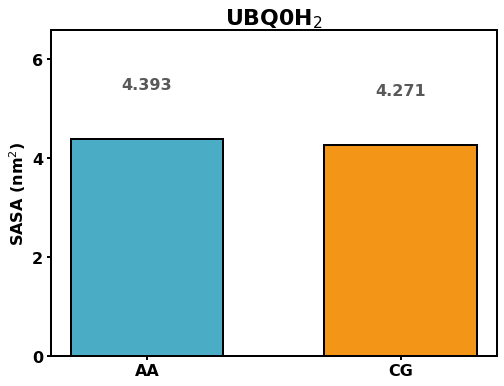

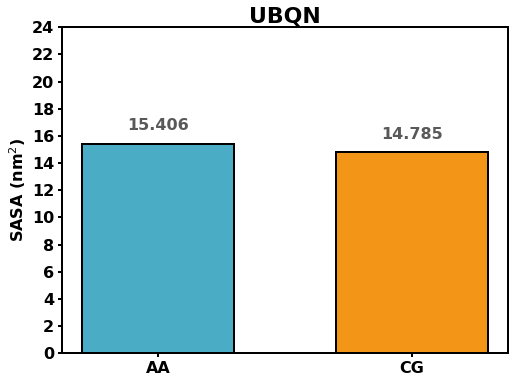

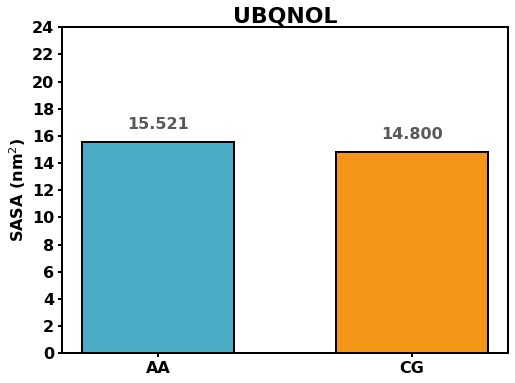

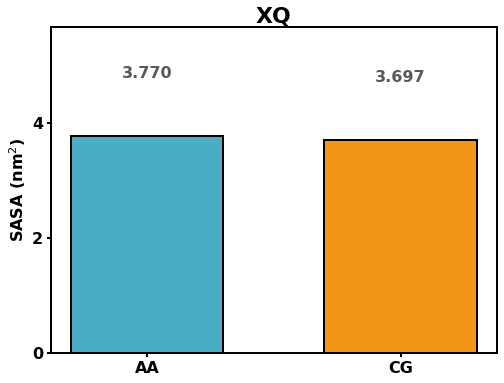

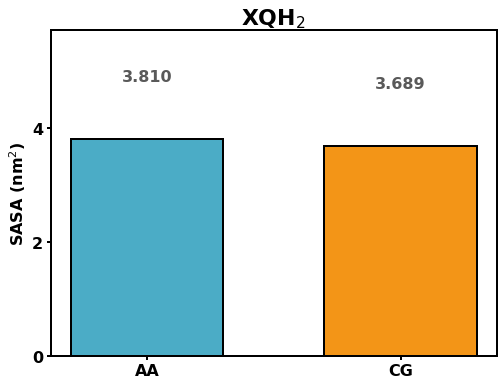

In [5]:
colors = ["#4bacc6","#f39517"]
pos = np.arange(1,2,.5)
labels = ['AA', 'CG']
ft_labels = 16

for compound in compounds:
    aa_reference = float("{:.3f}".format(MeansAA[compound]))
    aa_reference_std = float("{:.3f}".format(SASAsAAdifferences[compound][0]))

    cg_reference = float("{:.3f}".format(MeansCG[compound]))
    cg_reference_std = float("{:.3f}".format(SASAsCGdifferences[compound][0]))

    heights = [aa_reference, cg_reference]
    yerrs = np.array((aa_reference_std, cg_reference_std))
    if type(SASAsAACIS[compound]) != type(str()) or type(SASAsCGCIS[compound]) != type(str()):
        fig, ax = plt.subplots()
        ax.bar(pos, heights, yerr=yerrs, tick_label=labels, width=.3, linewidth=2, color=colors, capsize=5, error_kw={'lw':2}, edgecolor='black')
        ax.set_ylim(0, 1.5*max(aa_reference, cg_reference))
        ax_ticks = np.arange(0, max(ax.get_yticks()), 2)
        ax.set_yticks(ax_ticks)
        ax.axes.xaxis.set_ticklabels(labels, fontsize=ft_labels, weight='bold')
        ax.set_yticklabels(ax_ticks, fontsize=ft_labels, weight='bold')
        ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.0f}'))
        ax.xaxis.tick_bottom()
        ax.tick_params(labeltop=False)  # don't put tick labels at the top
        ax.text(1, aa_reference+aa_reference_std+1, f'{aa_reference:.3f} ± {aa_reference_std:.3f}', ha='center', fontsize=ft_labels, color='#595959', weight='bold')
        ax.text(1.5, cg_reference+cg_reference_std+1, f'{cg_reference:.3f} ± {cg_reference_std:.3f}', ha='center', fontsize=ft_labels, color='#595959', weight='bold')

        d = .3  # proportion of vertical to horizontal extent of the slanted line

        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        ax.tick_params(width=2, length=4)


        if compound == "DMNFQH2":
            compound = "DMNFQH$_2$"
        if compound == "UBQH2":
            compound = "UBQH$_2$"
        if compound == "UBQ0":
            compound = "UBQ-0"
        if compound == "NAD+":
            compound = "NAD$^+$"
        if compound == "NADP+":
            compound = "NADP$^+$"
        if compound == "UBQ0H2":
            compound = "UBQ0H$_2$"
        if compound == "XQH2":
            compound = "XQH$_2$"
        ax.set_title(f"{compound}", verticalalignment='center', fontsize=22, weight='bold', pad= "10.0")
        ax.set_ylabel("SASA (nm$^{2}$)", fontsize=ft_labels, weight='bold')
        figure = plt.gcf() # get current figure
        figure.set_size_inches(8, 6)
        plt.savefig(f"{compound}.svg", format='svg', orientation="landscape", quality=95, dpi = 100, bbox_inches="tight")
        plt.show()

    else:
        fig, ax = plt.subplots()
        ax.bar(pos, heights, yerr=yerrs, tick_label=labels, width=.3, linewidth=2, color=colors, capsize=5, error_kw={'lw':2}, edgecolor='black')
        ax.set_ylim(0, 1.5*max(aa_reference, cg_reference))
        ax_ticks = np.arange(0, max(ax.get_yticks()), 2)
        ax.set_yticks(ax_ticks)
        ax.axes.xaxis.set_ticklabels(labels, fontsize=ft_labels, weight='bold')
        ax.set_yticklabels(ax_ticks, fontsize=ft_labels, weight='bold')
        ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.0f}'))
        ax.xaxis.tick_bottom()
        ax.tick_params(labeltop=False)  # don't put tick labels at the top
        ax.text(1, aa_reference+aa_reference_std+1, f'{aa_reference:.3f}', ha='center', fontsize=ft_labels, color='#595959', weight='bold')
        ax.text(1.5, cg_reference+cg_reference_std+1, f'{cg_reference:.3f}', ha='center', fontsize=ft_labels, color='#595959', weight='bold')

        d = .3  # proportion of vertical to horizontal extent of the slanted line

        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        ax.tick_params(width=2, length=4)


        if compound == "DMNFQH2":
            compound = "DMNFQH$_2$"
        if compound == "UBQH2":
            compound = "UBQH$_2$"
        if compound == "UBQ0":
            compound = "UBQ-0"
        if compound == "NAD+":
            compound = "NAD$^+$"
        if compound == "NADP+":
            compound = "NADP$^+$"
        if compound == "UBQ0H2":
            compound = "UBQ0H$_2$"
        if compound == "XQH2":
            compound = "XQH$_2$"
        ax.set_title(f"{compound}", verticalalignment='center', fontsize=22, weight='bold', pad= "10.0")
        ax.set_ylabel("SASA (nm$^{2}$)", fontsize=ft_labels, weight='bold')
        figure = plt.gcf() # get current figure
        figure.set_size_inches(8, 6)
        plt.savefig(f"{compound}.svg", format='svg', orientation="landscape", quality=95, dpi = 100, bbox_inches="tight")
        plt.show()

ATP 7.653+/-0.018 7.606+/-0.015
FAD 9.9+/-0.5 9.7+/-0.5
NADPH 10.86+/-0.13 10.96+/-0.13
TPP 6.72+/-0.05 6.44+/-0.05


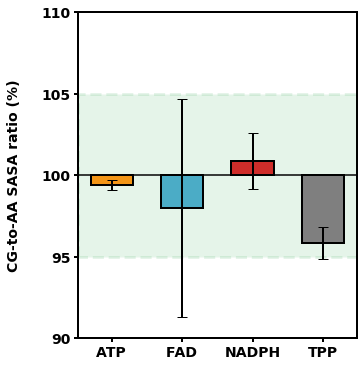

In [6]:
#ATP, NADPH, FAD, TPP
pos = np.arange(1,2, 0.25)

ft_labels = 14

height_compound=[]
height_std=[]
uncertain = []
compounds = ["ADOS", "ADP", "ALO", "AMP", "ATP", "DMNFQ", "DMNFQH2", "FAD", "FMN", "GBZ", "HAQO", "HAQOH", "HQNO", "HQNOH", "ISO", "MND", "MNDOL", "MNQ", "MNQOL", "NAD+", "NADH", "NADP+", "NADPH", "NRBOS", "PQ", "PQOL", "RBFL", "RIB", "THI", "TMP", "TPP", "UBQ0", "UBQ0H2", "UBQN", "UBQNOL", "XQ", "XQH2"]

for compound in compounds:
    if compound == "ATP" or compound == "FAD" or compound == "NADPH" or compound == "TPP":          
        aa_reference = MeansAA[compound]
        aa_reference_ci = SASAsAACIS[compound]
        cg_reference = MeansCG[compound]
        cg_reference_ci = SASAsCGCIS[compound]
        aa = ufloat(aa_reference, np.abs(aa_reference_ci - aa_reference).mean())
        cg = ufloat(cg_reference, np.abs(cg_reference_ci - cg_reference).mean())
        values_uncertain = (cg/aa-1)*100
        uncertain.append(values_uncertain)
        print(compound, aa, cg)
    
compounds=["ATP", "FAD", "NADPH","TPP"]

   
fig, ax = plt.subplots()
ax.axhspan(95, 105, color="#32a85020", linestyle="--", linewidth=3)
ax.bar(pos, [u.nominal_value for u in uncertain], yerr=[u.std_dev for u in uncertain], bottom = 100, tick_label=compounds, width=0.15, linewidth=2, color=["#f39517", "#4bacc6", "#CF2D2A", "#7f7f7f"], capsize=5, error_kw={'lw':2}, edgecolor='black')
#ax.bar(pos, height_compound, yerr=height_std, tick_label=compounds, width=.3, linewidth=2, color=colors, capsize=5, error_kw={'lw':2}, edgecolor='black')
ax.axhline(y = 100, color="black")
ax.set_ylim(90, 110)
ax_ticks = np.arange(90, 112, 5)
ax.set_yticks(ax_ticks)
ax.axes.xaxis.set_ticklabels(compounds, fontsize=ft_labels, weight='bold')

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.0f}'))
ax.xaxis.tick_bottom()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
ax.tick_params(width=2, length=4)

#ax.set_title("CG-to-AA SASA ratio for ATP, NADPH, FAD and TPP", verticalalignment='center', fontsize=18, weight='bold', pad= "30.0")
ax.set_ylabel("CG-to-AA SASA ratio (%)", fontsize=ft_labels, weight='bold', labelpad=20)
#ax.set_xlabel("Compound", fontsize=ft_labels, weight='bold', labelpad=20)
ax.set_yticklabels(ax_ticks, fontsize=ft_labels, weight='bold')
figure = plt.gcf() # get current figure
figure.set_size_inches(5, 6)
plt.savefig("ratios_article.svg", format='svg', orientation="landscape", quality=95, dpi = 100, bbox_inches="tight")
plt.show()


In [7]:
cg/aa

0.9582766823987436+/-0.00993541176934183

ATP 7.653+/-0.018 7.606+/-0.015
FAD 9.9+/-0.5 9.7+/-0.5
NADPH 10.86+/-0.13 10.96+/-0.13
TPP 6.72+/-0.05 6.44+/-0.05


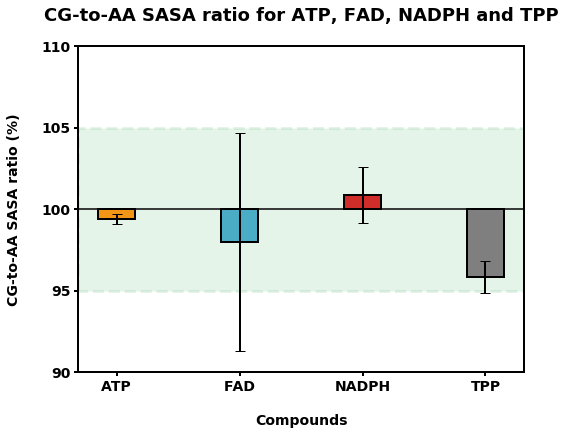

In [8]:
#ATP, NADPH, FAD, TPP
pos = np.arange(1,2, 0.25)

ft_labels = 14

height_compound=[]
height_std=[]
uncertain = []
compounds = ["ADOS", "ADP", "ALO", "AMP", "ATP", "DMNFQ", "DMNFQH2", "FAD", "FMN", "GBZ", "HAQO", "HAQOH", "HQNO", "HQNOH", "ISO", "MND", "MNDOL", "MNQ", "MNQOL", "NAD+", "NADH", "NADP+", "NADPH", "NRBOS", "PQ", "PQOL", "RBFL", "RIB", "THI", "TMP", "TPP", "UBQ0", "UBQ0H2", "UBQN", "UBQNOL", "XQ", "XQH2"]

for compound in compounds:
    if compound == "ATP" or compound == "FAD" or compound == "NADPH" or compound == "TPP":          
        aa_reference = MeansAA[compound]
        aa_reference_ci = SASAsAACIS[compound]
        cg_reference = MeansCG[compound]
        cg_reference_ci = SASAsCGCIS[compound]
        aa = ufloat(aa_reference, np.abs(aa_reference_ci - aa_reference).mean())
        cg = ufloat(cg_reference, np.abs(cg_reference_ci - cg_reference).mean())
        values_uncertain = (cg/aa-1)*100
        uncertain.append(values_uncertain)
        print(compound, aa, cg)
    
compounds=["ATP", "FAD", "NADPH","TPP"]

   
fig, ax = plt.subplots()
ax.axhspan(95, 105, color="#32a85020", linestyle="--", linewidth=3)
ax.bar(pos, [u.nominal_value for u in uncertain], yerr=[u.std_dev for u in uncertain], bottom = 100, tick_label=compounds, width=0.075, linewidth=2, color=["#f39517", "#4bacc6", "#CF2D2A", "#7f7f7f"], capsize=5, error_kw={'lw':2}, edgecolor='black')
#ax.bar(pos, height_compound, yerr=height_std, tick_label=compounds, width=.3, linewidth=2, color=colors, capsize=5, error_kw={'lw':2}, edgecolor='black')
ax.axhline(y = 100, color="black")
ax.set_ylim(90, 110)
ax_ticks = np.arange(90, 112, 5)
ax.set_yticks(ax_ticks)
ax.axes.xaxis.set_ticklabels(compounds, fontsize=ft_labels, weight='bold')

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.0f}'))
ax.xaxis.tick_bottom()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
ax.tick_params(width=2, length=4)

ax.set_title("CG-to-AA SASA ratio for ATP, FAD, NADPH and TPP", verticalalignment='center', fontsize=18, weight='bold', pad= "30.0")
ax.set_ylabel("CG-to-AA SASA ratio (%)", fontsize=ft_labels, weight='bold', labelpad=20)
ax.set_xlabel("Compounds", fontsize=ft_labels, weight='bold', labelpad=20)
ax.set_yticklabels(ax_ticks, fontsize=ft_labels, weight='bold')
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)
plt.savefig("ratios_thesis.svg", format='svg', orientation="landscape", quality=95, dpi = 100, bbox_inches="tight")
plt.show()


In [9]:
(cg/aa)*100

95.82766823987437+/-0.993541176934183

In [15]:
uncertain = []
compounds = ["ADOS", "ADP", "ALO", "AMP", "ATP", "DMNFQ", "DMNFQH2", "FAD", "FMN", "GBZ", "HAQO", "HAQOH", "HQNO", "HQNOH", "ISO", "MND", "MNDOL", "MNQ", "MNQOL", "NAD+", "NADH", "NADP+", "NADPH", "NRBOS", "PQ", "PQOL", "RBFL", "RIB", "THI", "TMP", "TPP", "UBQ0", "UBQ0H2", "UBQN", "UBQNOL", "XQ", "XQH2"]

for compound in compounds:   
    aa_reference = MeansAA[compound]
    aa_reference_ci = SASAsAACIS[compound]
    cg_reference = MeansCG[compound]
    cg_reference_ci = SASAsCGCIS[compound]
    if aa_reference_ci != "None" or cg_reference_ci != "None":
        aa = ufloat(aa_reference, np.abs(aa_reference_ci - aa_reference).mean())
        cg = ufloat(cg_reference, np.abs(cg_reference_ci - cg_reference).mean())
        values_uncertain = (cg/aa-1)*100
        uncertain.append(values_uncertain)
    else:
        aa = aa_reference
        cg = cg_reference
        values_uncertain = (cg/aa-1)*100
        uncertain.append(values_uncertain)
    print(compound, "|||", values_uncertain, "|||", aa, "|||", cg)

ADOS ||| -0.69+/-0.07 ||| 5.3106+/-0.0019 ||| 5.2738+/-0.0032
ADP ||| -0.18+/-0.23 ||| 6.936+/-0.012 ||| 6.924+/-0.010
ALO ||| -1.485+/-0.022 ||| 5.0708+/-0.0007 ||| 4.9955+/-0.0009
AMP ||| 0.29+/-0.09 ||| 6.188+/-0.004 ||| 6.207+/-0.004
ATP ||| -0.61+/-0.30 ||| 7.653+/-0.018 ||| 7.606+/-0.015
DMNFQ ||| -2.549246813441486 ||| 4.315 ||| 4.205
DMNFQH2 ||| -4.190006721935924 ||| 4.463 ||| 4.276
FAD ||| -2+/-7 ||| 9.9+/-0.5 ||| 9.7+/-0.5
FMN ||| -3.3+/-0.5 ||| 7.603+/-0.032 ||| 7.355+/-0.024
GBZ ||| -6.3+/-0.8 ||| 6.00+/-0.05 ||| 5.616+/-0.005
HAQO ||| 3.363518758085382 ||| 3.865 ||| 3.995
HAQOH ||| -1.2009803921568696 ||| 4.08 ||| 4.031
HQNO ||| 0.7961007311129142 ||| 6.155 ||| 6.204
HQNOH ||| -4.63565891472869 ||| 6.45 ||| 6.151
ISO ||| -8.3+/-0.9 ||| 7.04+/-0.05 ||| 6.46+/-0.04
MND ||| -2.4586288416075686 ||| 4.23 ||| 4.126
MNDOL ||| -2.3854511100614095 ||| 4.234 ||| 4.133
MNQ ||| -3.261514133227905 ||| 15.177 ||| 14.682
MNQOL ||| -1.8471252015045736 ||| 14.888 ||| 14.613
NAD+ ||| 1.5+/

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if __name__ == '__main__':


In [11]:
uncertain

[-0.6941737471847786+/-0.06925249309517108,
 -0.1805745332309039+/-0.225037236827734,
 -1.4851513608330813+/-0.02247176055349675,
 0.2942215578243257+/-0.08759342444197206,
 -0.614597901635161+/-0.3001900994366768,
 -2.549246813441486,
 -4.190006721935924,
 -2.007446552330927+/-6.674407314051929,
 -3.261426611222884+/-0.5211160210512067,
 -6.334448577064677+/-0.8320438839820486,
 3.363518758085382,
 -1.2009803921568696,
 0.7961007311129142,
 -4.63565891472869,
 -8.321783573103335+/-0.8878078183649468,
 -2.4586288416075686,
 -2.3854511100614095,
 -3.261514133227905,
 -1.8471252015045736,
 1.5025164879720831+/-1.7874822917855893,
 1.1175513202734466+/-2.2590009348214304,
 1.198556934482431+/-3.325553548441351,
 0.8919269665520257+/-1.7156395024725277,
 0.3702856614818284+/-0.06098026517581613,
 -5.864177663340842,
 -4.3351819288516165,
 -3.9696148826988242+/-0.5899172432659187,
 -7.603578566893643+/-0.7430194152374519,
 -2.802029839839004+/-0.16429401767505006,
 -1.5810205855469217+/-0.6

In [12]:
100*cg/aa

96.8241469816273

In [13]:
np.abs(aa_reference_ci - aa_reference).mean()

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [ ]:
uncertain

In [ ]:
pos_new = np.arange(1,9.75, 0.25)

ft_labels = 16

height_compound=[]
uncertain = []
compounds = ["ADOS", "ADP", "ALO", "AMP", "ATP", "DMNFQ", "DMNFQH2", "FAD", "FMN", "GBZ", "HAQO", "HAQOH", "HQNO", "HQNOH", "ISO", "MND", "MNDOL", "MNQ", "MNQOL", "NAD+", "NADH", "NADP+", "NADPH", "NRBOS", "PQ", "PQOL", "RBFL", "RIB", "THI", "TMP", "TPP", "UBQ0", "UBQ0H2", "UBQN", "UBQNOL", "XQ", "XQH2"]

for compound in compounds:         
    aa_reference = float("{:.3f}".format(MeansAA[compound]))
    aa_reference_std = float("{:.3f}".format(SASAsAAdifferences[compound][0]))
    cg_reference = float("{:.3f}".format(MeansCG[compound]))
    cg_reference_std = float("{:.3f}".format(SASAsCGdifferences[compound][0]))
    value_compound = aa_reference/cg_reference
    value_compound = (value_compound-1)*100
    height_compound.append(value_compound)
    aa = ufloat(aa_reference, aa_reference_std)
    cg = ufloat(cg_reference, cg_reference_std)
    values_uncertain = (aa/cg)*100
    uncertain.append(values_uncertain.std_dev)
   
fig, ax = plt.subplots()
ax.axhspan(95, 105, color="#32a85020", linestyle="--", linewidth=3)
ax.bar(pos_new, height_compound, yerr=uncertain, bottom = 100, tick_label=compounds, width=0.075, color="#7f7f7f", linewidth=2, capsize=5, error_kw={'lw':2}, edgecolor='black')
#ax.bar(pos, height_compound, yerr=height_std, tick_label=compounds, width=.3, linewidth=2, color=colors, capsize=5, error_kw={'lw':2}, edgecolor='black')
ax.axhline(y = 100, color="black")
ax.set_ylim(90, 110)
ax_ticks = np.arange(90, 112, 5)
ax.set_yticks(ax_ticks)
ax.axes.xaxis.set_ticklabels(compounds, fontsize=ft_labels, weight='bold', horizontalalignment="center")
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.0f}'))
ax.xaxis.tick_bottom()

plt.xticks(rotation=90)  # don't put tick labels at the top



for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
ax.tick_params(width=2, length=4)

ax.set_title("AA/CG ratios", verticalalignment='center', fontsize=22, weight='bold', pad= "30.0")
ax.set_ylabel("Percentage of AA/CG ratio (%)", fontsize=ft_labels, weight='bold', labelpad=10)
ax.set_yticklabels(ax_ticks, fontsize=ft_labels, weight='bold')
figure = plt.gcf() # get current figure
figure.set_size_inches(16,12)
plt.savefig("ratios_all.svg", format='svg', orientation="landscape", quality=95, dpi = 100, bbox_inches="tight")
plt.show()